In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

cr_post_table = sqlite3.connect('cruise_post.db')
cr_pre_table = sqlite3.connect('cruise_pre.db')

In [2]:
query = "SELECT * FROM cruise_post"  
dfpost = pd.read_sql_query(query, cr_post_table)

query = "SELECT * FROM cruise_pre"
dfpre = pd.read_sql_query(query, cr_pre_table)

In [3]:
dfpre.head()

,index,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI
1,1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,NaN,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,NaN,5.0,Extremely important,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,NaN,NaN,3.0,2.0,4.0,LB243DMKCFL
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,2.0,NaN,Not at all important,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS


In [4]:
dfpre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133746 entries, 0 to 133745
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   index                                       133746 non-null  int64  
 1   Gender                                      120290 non-null  object 
 2   Date of Birth                               119062 non-null  object 
 3   Source of Traffic                           133746 non-null  object 
 4   Onboard Wifi Service                        114254 non-null  object 
 5   Embarkation/Disembarkation time convenient  118103 non-null  float64
 6   Ease of Online booking                      115391 non-null  float64
 7   Gate location                               116606 non-null  float64
 8   Logging                                     133746 non-null  object 
 9   Onboard Dining Service                      116937 non-null  object 
 

In [5]:
dfpost.head()

,index,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment
0,0,Blastoise,None,3567 KM,LB446RWOOZI,1.0,1,1.0
1,1,Blastoise,Deluxe,672 KM,LB138HKBECM,NaN,0,1.0
2,2,IAPRAS,Deluxe,1167 KM,BL713UHBAAN,NaN,0,0.0
3,3,Lapras,Deluxe,280 KM,LB243DMKCFL,NaN,0,1.0
4,4,Lapras,Standard,1145 Miles,LB218CFLOBS,NaN,1,NaN


##### We can simply drop the index column

In [6]:
dfpre.drop('index', axis=1, inplace=True)
dfpost.drop('index', axis=1, inplace=True)

#### Column names from the presurvey data and post-trip data are unique, other than Ext_Intcode. Perform inner join on this feature.  This feature identifies every passenger, but in both pre-trip and post-trip datasets, only about 97% of the entries are unique. We can attribute the ~3% non-uniqueness to errors in data entry, and drop this column after merging the datasets

In [7]:
len(dfpre['Ext_Intcode'].unique().tolist())/len(dfpre)

0.9708701568645044

In [8]:
len(dfpost['Ext_Intcode'].unique().tolist())/len(dfpost)

0.9708701568645044

In [9]:
common_columns = set(dfpre.columns) & set(dfpost.columns)

df = pd.merge(dfpre, dfpost, on='Ext_Intcode', how='inner')
df.drop('Ext_Intcode', axis=1, inplace=True)

# need to list out non-unique to see if the entries are same, repeated ones (then remove 1 row?) or something else (too messy then remove entirely?)?
# find ranking of which (wifi,d,e) has most 4/5 ranking options voted
# for those w 4/5 rank options voted, were they satisfied

## 1. Convert all entries to numbers

#### Get an overview of the types of information in each column. We want to convert every entry to a number.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141538 entries, 0 to 141537
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Gender                                      127308 non-null  object 
 1   Date of Birth                               126056 non-null  object 
 2   Source of Traffic                           141538 non-null  object 
 3   Onboard Wifi Service                        120910 non-null  object 
 4   Embarkation/Disembarkation time convenient  125005 non-null  float64
 5   Ease of Online booking                      122047 non-null  float64
 6   Gate location                               123400 non-null  float64
 7   Logging                                     141538 non-null  object 
 8   Onboard Dining Service                      123793 non-null  object 
 9   Online Check-in                             124909 non-null  float64
 

In [11]:
df.isnull().mean().round(3)

Gender                                        0.101
Date of Birth                                 0.109
Source of Traffic                             0.000
Onboard Wifi Service                          0.146
Embarkation/Disembarkation time convenient    0.117
Ease of Online booking                        0.138
Gate location                                 0.128
Logging                                       0.000
Onboard Dining Service                        0.125
Online Check-in                               0.117
Cabin Comfort                                 0.174
Onboard Entertainment                         0.119
Cabin service                                 0.103
Baggage handling                              0.174
Port Check-in Service                         0.107
Onboard Service                               0.138
Cleanliness                                   0.160
Cruise Name                                   0.119
Ticket Type                                   0.150
Cruise Dista

#### First convert "Dining" to a float number, like the rest

In [12]:
df['Dining'] = df['Dining'].astype(float)

##### Next, for columns whose ratings are on the scale 1 to 5 in the prepurchase survey, 1 being "Not at all important" and 5 being "Extremely important", not all of them are uniform in their entries. Some are in the string format (eg, "Not at all important") while others are in numerical format. Convert all the entries in columns with the string format into their corresponding numerical values based on the scale.

In [13]:
mapping = {'Not at all important': 1, 'A little important': 2, 'Somewhat important': 3, 'Very important': 4, 'Extremely important': 5}
cols = df.columns[df.isin(['Somewhat important']).any()].tolist()
# check for columns with "Somwhat important" since this is considered the "average" value,
# and all relevant columns with string entries are expected to have them and 
# we are less likely to miss out any in cols.

for i in cols:
    df[i] = df[i].replace(mapping)

#### We next examine the rest of the columns in the pre-trip survey which are ratings for the level of importance of various on-board service.

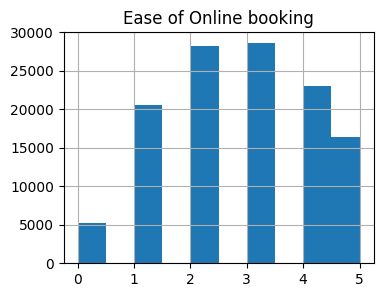

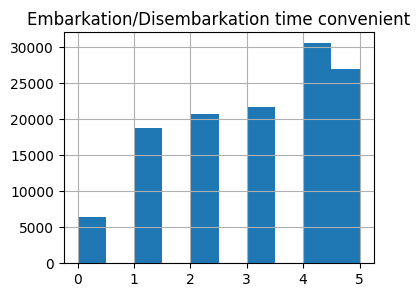

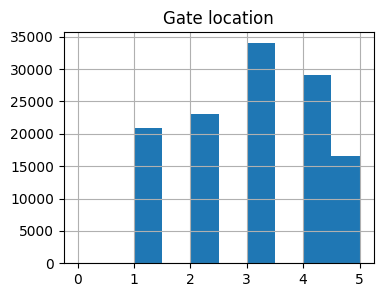

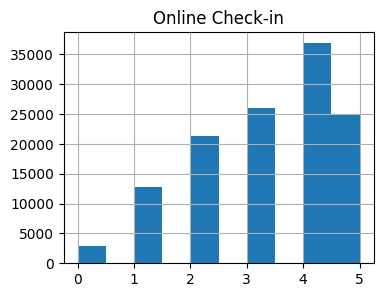

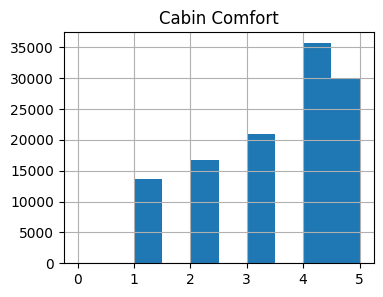

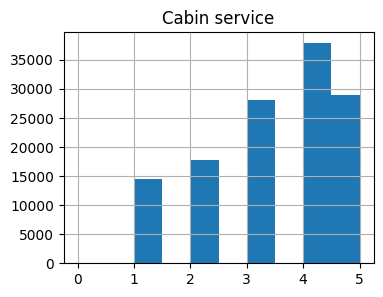

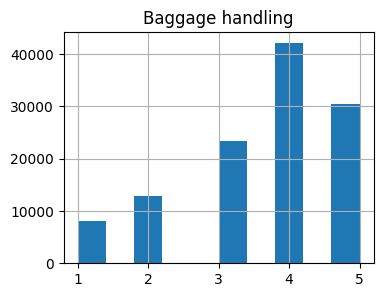

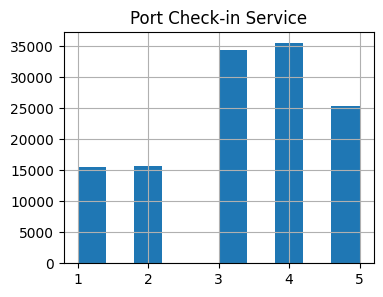

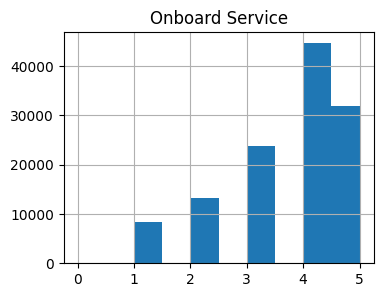

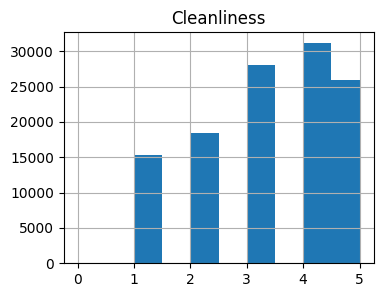

In [14]:
rating_col = ['Ease of Online booking', "Embarkation/Disembarkation time convenient", 'Gate location', 
                'Online Check-in', 'Cabin Comfort', 'Cabin service', 'Baggage handling', 
              'Port Check-in Service', 'Onboard Service', 'Cleanliness']

for i in rating_col:
    plt.figure(figsize=(4, 3))
    p = df[i].hist()
    
    plt.title(i)
    plt.show()

#### In general, most people value cleaniness and cabin service, as well as having services to ensure they have a smooth trip, such as port check-in service, baggage handling, convenience of embarkation/disembarkation time, and gate location.

#### Next, examine the data for "Ticket type". As expected, "deluxe" tickets form a minority. We should take care to maintain this ratio of ticket types when splitting the data into training and testing sets to ensure that there are enough "deluxe" targets in both sets for the model to train on and for evaluation of the model.

#### Also, map these ticket types to numerical values

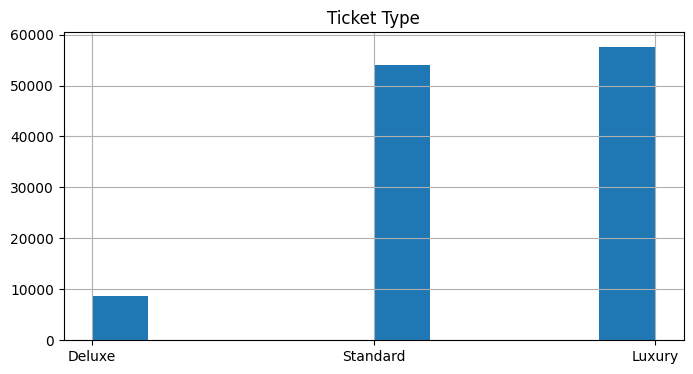

In [15]:
plt.figure(figsize=(8, 4)) 
df['Ticket Type'].hist()

plt.title('Ticket Type')
plt.show()

In [16]:
mapping2 = {'Deluxe': 3, 'Luxury': 2, 'Standard': 1}

df['Ticket Type'] = df['Ticket Type'].replace(mapping2)

#### Next, the column on "Cruise Name". It appears that there are different cruises, blastoise and lapras. But (missing entries aside) many entries are not inputted properly. Proceed to clean them up into either of these two categories. 

In [17]:
df['Cruise Name'] = df['Cruise Name'].str.lower()
print(df['Cruise Name'].unique())

['blastoise' 'iapras' 'lapras' None 'blast' 'lap' 'blast0ise']


In [18]:
df['Cruise Name'] = df['Cruise Name'].str.replace('blast0ise', 'blastoise')
df['Cruise Name'] = df['Cruise Name'].str.replace(r'\bblast\b', 'blastoise', regex=True)

df['Cruise Name'] = df['Cruise Name'].str.replace('iapras', 'lapras')
df['Cruise Name'] = df['Cruise Name'].str.replace(r'\blap\b', 'lapras', regex=True)

#### It appears that most people prefer the Blastoise cruise (even after accounting for ~12% of missing data).

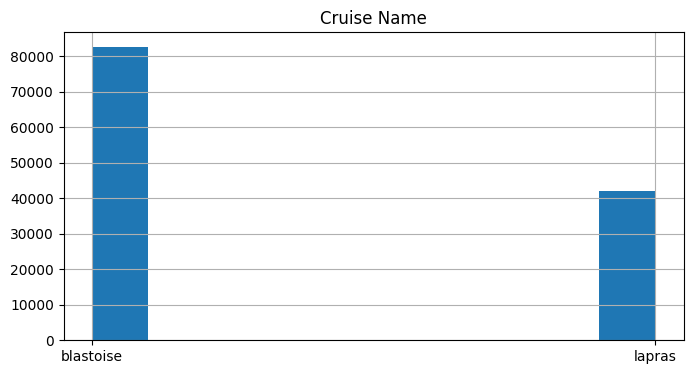

In [19]:
plt.figure(figsize=(8, 4)) 
df['Cruise Name'].hist()

plt.title('Cruise Name')
plt.show()

#### We can examine the proportion of missing values filtered by "Cruise Name". Since there are relatively low and similar proportions of missing values per category, we do not have to exclude any category from the analysis as we can conclude that the data is relatively complete and there are no major issues with data quality.

#### Thus we can impute missing data based on the most popular ticket filtered by cruise type. This also preserves the sample size as compared to dropping missing values.

In [59]:
missing_counts = df.groupby('Cruise Name')['Ticket Type'].apply(lambda x: x.isnull().sum())
cruise_names = ['missing', 'lapras', 'blastoise']
for i in range(len(missing_counts)):
    print(f"proportion missing in {cruise_names[i]}: ", round(missing_counts[i]/(len(df['Cruise Name'][df['Cruise Name']==i])),3) )

proportion missing in missing:  0.0
proportion missing in lapras:  0.0
proportion missing in blastoise:  0.0


#### Next, examine the entry on "Cruise Distance". It is somehow of an object type when instead, we expect a number.

In [20]:
df["Cruise Distance"].head()

0       3567 KM
1        672 KM
2       1167 KM
3        280 KM
4    1145 Miles
Name: Cruise Distance, dtype: object

#### There are entries with miles and km. Convert all units to km, and leave only the numerical value.

In [21]:
def convert(entry):
    
    try:
        n = entry.split()
        if len(n) == 2:
            value, unit = float(n[0]), n[1].lower()
            if unit == 'km':
                return value
            elif unit == 'miles':
                return value * 1.60934 
    except:
        return 
        
df['Cruise Distance'] = df['Cruise Distance'].apply(convert)


#### There are missing values for "Cruise Distance" that also have missing values for "Cruise Type". We can treat missing cruise types as a 3rd cruise category and fill these missing distances with the mean of this new category. 

#### One-hot encode the column "Cruise Name". Relabel missing values as 0. 

In [22]:
# df['cruise_name_missing'] = df['Cruise Name'].isnull().astype(float)

df['Cruise Name'].fillna(0, inplace=True)
mapping = {"lapras": 1.0, "blastoise":2.0}
df['Cruise Name'] = df['Cruise Name'].replace(mapping)


# avg_m = df['Cruise Distance'][df['Cruise Name']==0].mean()
# df['Cruise Distance'].fillna(avg_m, inplace=True)

#### Blastoise is generally a longer cruise than Lapras since its median and spread of values occupies a larger numerical position on the number scale.

#### Note also that, for some reason, there are negative cruise distances. We have to clean this up in the data preprocessing stage.

In [23]:
lapras = df.loc[df['Cruise Name'] == 1, 'Cruise Distance']
print("cruise name: Lapras")
lapras.describe()

cruise name: Lapras


count    37473.000000
mean       799.029470
std        934.490897
min      -6381.033100
25%        328.000000
50%        633.000000
75%       1107.000000
max       6403.563860
Name: Cruise Distance, dtype: float64

In [24]:
blast = df.loc[df['Cruise Name'] == 2, 'Cruise Distance']
print("cruise name: Blastoise")
blast.describe()

cruise name: Blastoise


count    73563.000000
mean      1223.415115
std       1407.427831
min      -6416.438580
25%        386.620800
50%        909.000000
75%       2079.000000
max       7987.154420
Name: Cruise Distance, dtype: float64

#### Now that "Cruise Name" has been cleaned up, we can proceed to further examine how the percieved importance of on-board services based on pre-trip ratings compares with cruise types.

#### Observations 
- Ease of online booking: looking at those who rated it 5, blastoise is the preferred cruise.
- Embarkation/disembarkation time convenience: as the level of importance goes up, proportion of preferences shift toward lapras, though the majority still prefer blastoise. 
- Online check-in: ratings 4 and above significantly prefer blastoise
- Cabin comfort: as the level of importance goes up, the proportion of preferences shift toward blastoise.
- Cabin service: as the level of importance goes up, the proportion of preferences shift toward blastoise.

#### Proportion of preferences of either of lapras or blastoise is similar across the rest of the on-board services. Since blastoise has a longer cruise distance (and hence expected cruise duration), it is reasonable to expect that better cabin comforts and services shift people's preferences toward the blastoise cruise.

#### Note: 0, 1, 2 for missing cruise name, lapras and blastoise, respectively.

In [25]:
for i in rating_col:
    m = df.pivot_table(index=i, columns='Cruise Name', aggfunc='size', fill_value=0)
    print(m)
    print("_______________________________________________")

Cruise Name              0.0   1.0    2.0
Ease of Online booking                   
0.0                      599  1965   2718
1.0                     2408  6096  12061
2.0                     3341  9773  15065
3.0                     3445  9824  15304
4.0                     2699  6060  14317
5.0                     2042  2504  11826
_______________________________________________
Cruise Name                                  0.0    1.0    2.0
Embarkation/Disembarkation time convenient                    
0.0                                          720   1249   4403
1.0                                         2224   3709  12810
2.0                                         2490   4174  14104
3.0                                         2508   4807  14359
4.0                                         3656  12271  14613
5.0                                         3271  11001  12636
_______________________________________________
Cruise Name     0.0    1.0    2.0
Gate location                 

#### We canalso examine how the percieved importance of on-board services based on pre-trip ratings compares with ticket types.

#### Observations 
- Ease of online booking: as the level of importance goes up, proportion of preferences shift toward luxury tickets
- Embarkation/disembarkation time convenience: as the level of importance goes up, proportion of preferences shift toward deluxe tickets.
- Gate location: as the level of importance goes up, proportion of preferences shift toward luxury tickets.
- Online check-in: as the level of importance goes up, proportion of preferences shift toward luxury tickets.
- Cabin comfort: as the level of importance goes up, the proportion of preferences shift toward luxury tickets.
- Cabin service: as the level of importance goes up, the proportion of preferences shift toward luxury tickets.
- Baggage handling: as the level of importance goes up, the proportion of preferences shift toward luxury tickets.
- Onboard service: as the level of importance goes up, the proportion of preferences shift toward luxury tickets.

#### The proportions of preferences for tickets are the same across perceptions for the remaining categories of cleaniness, port check-in service. More people seem to think that it is worth the extra cost to upgrade to a luxury ticket instead of a deluxe ticket for what they deem as important. Perhaps deluxe tickets only provide a marginal difference in these services to passengers such that people generally do not think it is worth the extra money to go for a deluxe ticket.

#### Note: ticket type 1,2,3 for standard, luxury, deluxe, respectively.

In [26]:
for i in rating_col:
    m = df.pivot_table(index=i, columns='Ticket Type', aggfunc='size', fill_value=0)
    print(m)
    print("_________________________________")

Ticket Type               1.0    2.0   3.0
Ease of Online booking                    
0.0                      2059   2043   376
1.0                      7914   8208  1329
2.0                     12197   9909  1805
3.0                     12320  10111  1905
4.0                      8101  10215  1324
5.0                      3875   9132   844
_________________________________
Ticket Type                                   1.0    2.0   3.0
Embarkation/Disembarkation time convenient                    
0.0                                          2883   2270   253
1.0                                          5775   9047  1068
2.0                                          6769   9673  1178
3.0                                          7399   9686  1319
4.0                                         13471  10519  2047
5.0                                         11354   9695  1838
_________________________________
Ticket Type      1.0    2.0   3.0
Gate location                    
0.0             

#### Next, we examine perceptions of the importance of dining, wifi and entertainment based on the pre-trip survey against how passengers felt towards these factors in the post-trip survey. Compare the satisfaction levels of passengers of wifi, dining, and entertainment from the post-trip survey with the respective rated level of importance in the pre-trip survey.

#### There is generally an equal proportion of passengers who are satisfied/unsatisfied with dining across perceptions of its importance, for all cruise types and ticket types.

In [27]:
cruise_names = ['missing name', 'lapras', 'blastoise']
tix_type = ['standard', 'luxury', 'deluxe']

for i in range(1,3): #cruise names 0,1,2 for missing, lapras, blastoise
    for j in range(1,4): #ticket type 1,2,3 for standard, luxury, deluxe
        df_cruise = df[df['Cruise Name'] == i]
        df_tixcruise = df_cruise[df_cruise['Ticket Type']==j]
        m = df_tixcruise.pivot_table(index='Onboard Dining Service', columns='Dining', aggfunc='size', fill_value=0)
        print(cruise_names[i], ", ", tix_type[j-1])
        print(m)
        print("_________________________________")

lapras ,  standard
Dining                   0.0   1.0
Onboard Dining Service            
1.0                     1817  1853
2.0                     2489  2574
3.0                     2505  2373
4.0                     2421  2359
5.0                     2278  2342
_________________________________
lapras ,  luxury
Dining                  0.0  1.0
Onboard Dining Service          
1.0                     265  256
2.0                     546  519
3.0                     519  571
4.0                     589  551
5.0                     558  576
_________________________________
lapras ,  deluxe
Dining                  0.0  1.0
Onboard Dining Service          
1.0                     256  269
2.0                     350  372
3.0                     329  360
4.0                     370  328
5.0                     302  341
_________________________________
blastoise ,  standard
Dining                   0.0   1.0
Onboard Dining Service            
1.0                     1474  1454
2.0        

#### There is also generally an equal proportion of passengers who are satisfied/unsatisfied with wifi across perceptions of its importance, for all cruise types and ticket types.

#### Interestingly, there are missing ratings for wifi for all standard and deluxe tickets across all cruise types (even after accounting for missing cruise types)

In [28]:
tix_type = ['standard', 'luxury', 'deluxe']

for i in range(3): #cruise names 0,1,2 for missing, lapras, blastoise
    for j in range(1,4): #ticket type 1,2,3 for standard, luxury, deluxe
        df_cruise = df[df['Cruise Name'] == i]
        df_tixcruise = df_cruise[df_cruise['Ticket Type']==j]
        m = df_tixcruise.pivot_table(index='Onboard Wifi Service', columns='WiFi', aggfunc='size', fill_value=0)
        print(cruise_names[i], ", ", tix_type[j-1])
        print(m)
        print("_________________________________")

missing name ,  standard
Empty DataFrame
Columns: []
Index: []
_________________________________
missing name ,  luxury
WiFi                  0.0  1.0
Onboard Wifi Service          
1.0                   520  585
2.0                   707  728
3.0                   683  601
4.0                   567  589
5.0                   461  472
_________________________________
missing name ,  deluxe
Empty DataFrame
Columns: []
Index: []
_________________________________
lapras ,  standard
Empty DataFrame
Columns: []
Index: []
_________________________________
lapras ,  luxury
WiFi                  0.0  1.0
Onboard Wifi Service          
1.0                   453  474
2.0                   603  582
3.0                   592  621
4.0                   518  454
5.0                   289  277
_________________________________
lapras ,  deluxe
Empty DataFrame
Columns: []
Index: []
_________________________________
blastoise ,  standard
Empty DataFrame
Columns: []
Index: []
__________________________

#### There is also generally an equal proportion of passengers who are satisfied/unsatisfied with entertainment across perceptions of its importance, for all cruise types and ticket types.

#### Interestingly, there are missing ratings for wifi for all standard tickets across all cruise types (even after accounting for missing cruise types)

In [29]:
cruise_names = ['missing cruise name', 'lapras', 'blastoise']
tix_type = ['standard', 'luxury', 'deluxe']

for i in range(3): #cruise names 0,1,2 for missing, lapras, blastoise
    for j in range(1,4): #ticket type 1,2,3 for standard, luxury, deluxe
        df_cruise = df[df['Cruise Name'] == i]
        df_tixcruise = df_cruise[df_cruise['Ticket Type']==j]
        m = df_tixcruise.pivot_table(index='Onboard Entertainment', columns='Entertainment', aggfunc='size', fill_value=0)
        print(cruise_names[i], ", ", tix_type[j-1])
        print(m)
        print("_________________________________")

missing cruise name ,  standard
Empty DataFrame
Columns: []
Index: []
_________________________________
missing cruise name ,  luxury
Entertainment           0.0  1.0
Onboard Entertainment           
1.0                     210  245
2.0                     414  400
3.0                     464  501
4.0                    1093  995
5.0                     867  902
_________________________________
missing cruise name ,  deluxe
Entertainment          0.0  1.0
Onboard Entertainment          
1.0                     58   72
2.0                     78  102
3.0                    111   87
4.0                     99  112
5.0                     94  101
_________________________________
lapras ,  standard
Empty DataFrame
Columns: []
Index: []
_________________________________
lapras ,  luxury
Entertainment          0.0  1.0
Onboard Entertainment          
1.0                    270  329
2.0                    378  412
3.0                    445  407
4.0                    752  793
5.0          

#### Check columns that are temporal ie, "Date of Birth" and "Logging"

In [30]:
df[['Date of Birth', 'Logging']]

,Date of Birth,Logging
0,05/10/1973,01/01/2023 0:00
1,None,01/01/2023 0:01
2,22/07/1998,01/01/2023 0:02
3,01/05/1970,01/01/2023 0:05
4,07/01/1960,01/01/2023 0:06
...,...,...
141533,None,31/08/2023 23:43
141534,None,31/08/2023 23:43
141535,14/09/1988,31/08/2023 23:38
141536,23/10/2012,31/08/2023 23:41


#### Since "Logging" just shows when a passenger's information was logged, it is safe to ignore this piece of information. Convert the information on DOB to age (in years) of the passenger.

In [31]:
from datetime import datetime

current_year = datetime.now().year

df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], dayfirst=True)
df['Date of Birth'] = current_year - df['Date of Birth'].dt.year
df.rename(columns={'Date of Birth': 'Age'}, inplace=True)

#### Examine the age entries, to check for anomalies. ~3% of the entries indicate that the passenger is over 122 years old (the oldest human who ever lived survived till 122 years old, anyone older than that likely doesnt exist, so these are erroneous entries). 


Replace these entries as well as missing values in this column with the mean of the subset of entries in this column that are <122 (effectively, this is equivalent to removing entries that are >122).

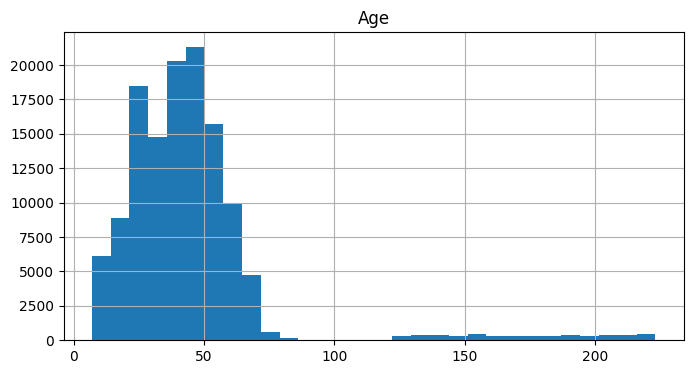

proportion of people older than 122:  0.035679464172165776


In [32]:
plt.figure(figsize=(8, 4)) 
df['Age'].hist(bins=30)

plt.title('Age')
plt.show()


print("proportion of people older than 122: ",(df['Age'] > 122).sum()/len(df))

#### Discounting people whose indicated age is >122, there does not seem to have any abnormalities in the age distribution. 

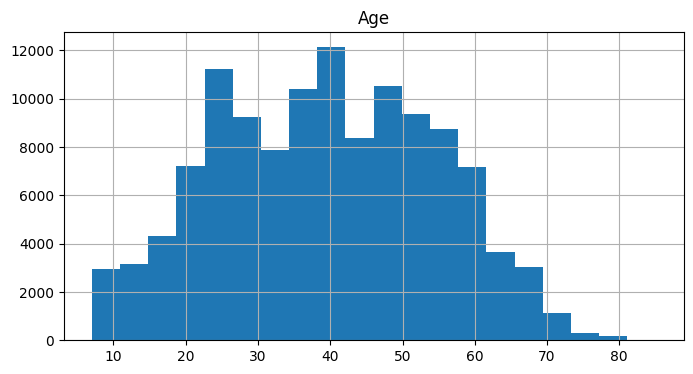

In [33]:
df0 = df.loc[df['Age']<122]
plt.figure(figsize=(8, 4)) 
df0['Age'].hist(bins=20)

plt.title('Age')
plt.show()

#### The male:female ratio is quite even

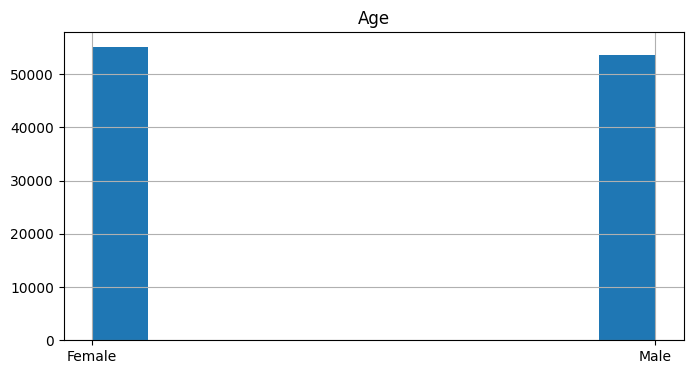

In [34]:
plt.figure(figsize=(8, 4)) 
df0['Gender'].hist()

plt.title('Gender')
plt.show()

#### Lastly, examine "Source of Traffic". A majority of passengers heard or booked cruise tickets directly. Direct marketing methods are working well.

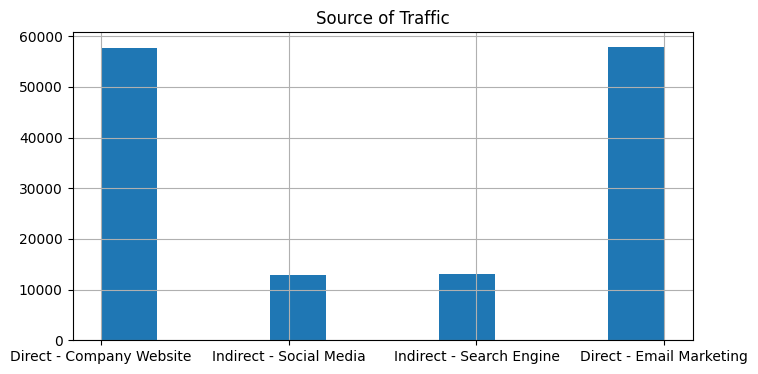

In [35]:
plt.figure(figsize=(8, 4)) 
df['Source of Traffic'].hist()

plt.title('Source of Traffic')
plt.show()

#### One-hot encode "Gender" and "Source of Traffic". Add a new column for each variable, with "1" as an entry wherever there are missing values.

#### Note: there are no missing values in "Source of Traffic".

In [36]:
# df['gender_missing'] = df['Gender'].isnull().astype(float)


df = pd.get_dummies(df, columns=['Gender'], prefix=['gender'], drop_first=True)
df = pd.get_dummies(df, columns=['Source of Traffic'], prefix=['traffic'], drop_first=True)

df[['traffic_Direct - Email Marketing', 'gender_Male', 'traffic_Indirect - Search Engine', 'traffic_Indirect - Social Media']] = df[['traffic_Direct - Email Marketing', 'gender_Male', 'traffic_Indirect - Search Engine', 'traffic_Indirect - Social Media']].astype(float)


#### All values in the dataframe are numerical values. We can examine their statistics.

In [37]:
df1 = df.iloc[:, :12]
df1.describe()

,Age,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling
count,126056.000000,120910.000000,125005.000000,122047.000000,123400.000000,123793.000000,124909.000000,116917.000000,124693.000000,126950.000000,116869.000000
mean,44.785603,2.814804,3.055886,2.759642,2.978104,3.205916,3.249790,3.440193,3.358545,3.385238,3.634360
std,30.812831,1.258693,1.525412,1.400819,1.277604,1.327344,1.351436,1.321744,1.333470,1.286991,1.178282
min,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,41.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,52.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,223.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [38]:
df2 = df.iloc[:, 12:]
df2.describe()

,Port Check-in Service,Onboard Service,Cleanliness,Cruise Name,Ticket Type,Cruise Distance,WiFi,Dining,Entertainment,gender_Male,traffic_Direct - Email Marketing,traffic_Indirect - Search Engine,traffic_Indirect - Social Media
count,126389.000000,122059.000000,118824.000000,141538.000000,120282.000000,126234.000000,67758.000000,141538.000000,77969.000000,141538.000000,141538.000000,141538.000000,141538.000000
mean,3.311048,3.642845,3.285658,1.464024,1.623501,1078.360644,0.500561,0.499187,0.504098,0.443754,0.408971,0.092032,0.091509
std,1.266061,1.176825,1.313191,0.698232,0.616139,1280.928100,0.500003,0.500001,0.499986,0.496828,0.491646,0.289072,0.288333
min,1.000000,0.000000,0.000000,0.000000,1.000000,-6416.438580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,1.000000,1.000000,363.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,3.000000,2.000000,2.000000,788.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,2.000000,2.000000,1721.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,2.000000,3.000000,7987.154420,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
- The max age is 223 years. As mentioned, ignore entries with age>122 and replace such entries and missing values with the mean age.
- There are negative cruise distances. Count them and if there aren't too many, replace them with the average cruise distance accroding to cruise types.
- For features with entries that are values on the scale of 1-5 (those in the pre-trip survey), the mean value is around 3, other than "Onboard Service" with the mean closer to a score of 4. Since these features have discrete values as entries, fill in missing values in each column with their respective median instead, since it is an integer. It is also a better representation of the score as there are more than 1 of these with median=4, indicating that these distributions are slightly skewed. 
- Those with median 4 are: cabin comfort, onboard entertainment, cabin service, baggage handling, and onboard service. Based on the analysis performed above, passengers who rated these factors as important are generally more likely to purchase luxury tickets.

#### We can examine the proportion of missing values filtered by "Cruise Name". Since there are relatively low and similar proportions of missing values per category, we do not have to exclude any category from the analysis as we can conclude that the data is relatively complete and there are no major issues with data quality.

#### Thus we can impute missing data based on the most popular ticket filtered by cruise type. This also preserves the sample size as compared to dropping missing values.

## Summary

#### 1. Blastoise cruise travels for longer distances, and thus is exepcted to be a longer duration cruise compared to Lapras. In general, people who rate ease of online booking, embarkation/disembarkation time, cabin service, cabin comfort and online check-in with a higher importance tend to go for the Blastoise cruise.

#### 2. The preferences of passengers shift toward luxury tickets as the level of importance of gate location, baggage handling, onboard service as well as the factors mentioned in point 1 (except for embarkation/disembarkation time) rises. For embarkation/disembarkation time, the preference shifts toward deluxe tickets instead.

#### 3. There are equal proportions of people who are satisfied and dissatisfied with wifi, dining and entertainment across various perceived levels of importance of these services, cruise types and ticket types.

#### 4. The proportion of male to female passengers are quite equal.

#### 5. Most passengers book tickets or heard about the company from direct marketing means, via either the company website or through emails. 